In [1]:
import os
from timeit import default_timer as timer
import utils.datautils as datautils
import utils.registration as registration
import tifffile as tif

/home/tli_project/.local/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
path_to_data = '/home/tli_project/Desktop/Data/T4/stage2/220219/220219_analysis/220219_P48_N1/shifted_T4_Yn30_Z45/'
save_path = '/home/tli_project/Desktop/Data/T4/stage2/220219/220219_analysis/220219_P48_N1/shifted_T4_Yn30_Z45/'
group_by = '220219_P48_N1_seg2_shifted_FlipV_R15.tif'
ch_names = ['GFP','Red']
save_name = '220219_P48_N1__shifted_FlipV_R15'
compile = False


In [3]:
image_5D = tif.imread(path_to_data+group_by)

In [4]:
image_5D.shape

(71, 86, 400, 400)

In [41]:
from scipy import ndimage

output_GFP = image_5D.copy()
# output_red = image_5D[:,:,0].copy()
shift = (0,-30,45)
for i, st in enumerate(output_GFP[0:4]):
    output_GFP[i] = ndimage.shift(output_GFP[i], shift)
    # output_red[i] = ndimage.shift(output_red[i], shift) 

# tif.imwrite(save_path+'red'+save_name, output_red, imagej=True, resolution=(1./0.076, 1./0.076),
#                 metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})
tif.imwrite(save_path+'GFP'+save_name, output_GFP, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

In [44]:
#imports
import matplotlib.pyplot as plt
import tifffile as tif
import numpy as np
from tqdm import tqdm

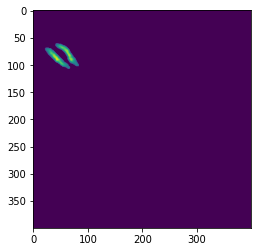

In [6]:
import matplotlib.pyplot as plt

plt.imshow(image_5D[20,20])

In [7]:
from tqdm import tqdm
import numpy as np
import utils.datautils as datautils
import os
from skimage.filters import gaussian
from skimage.registration import phase_cross_correlation as corr
import csv
from scipy import ndimage

In [20]:
import numpy as np
import utils.datautils as datautils
import os
from scipy import ndimage

output = image_5D.copy()
shift = (0,-15,50)
for i, st in enumerate(image_5D[0:4]):
    output[i] = ndimage.shift(st, shift) 


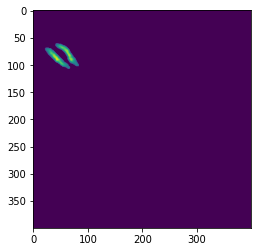

In [21]:
import matplotlib.pyplot as plt

plt.imshow(image_5D[20,20])

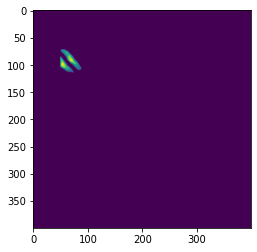

In [22]:
plt.imshow(output[2,20])

In [13]:
registration.phase_corr_4D(image_4D, sigma=5, xy_pixel=1, 
                            z_pixel=1, ch_names=ch_names, 
                            ref_ch=ch_names[0],                      
                            save=True, save_path=save_path,
                            save_file=save_name, save_shifts=True)

applying phase_corr: 100%|██████████| 70/70 [01:11<00:00,  1.02s/it]


({'GFP': array([[[[0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           ...,
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0]],
  
          [[0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           ...,
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0]],
  
          [[0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           ...,
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0]],
  
          ...,
  
          [[0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           ...,
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0],
           [0, 0, 0, ..., 0, 0, 0]],
  
          [[0, 0, 0, ..., 0, 0,

In [4]:
path_to_data = '/home/tli_project/Desktop/Data/T4/stage2/220219/220219_analysis/220219_P48_N1/'
save_path = '/home/tli_project/Desktop/Data/T4/stage2/220219/220219_analysis/220219_P48_N1/'
group_by = '220219_P48_N1_clahe.tif'
ch_names = ['GFP']
save_name = 'SyNRA_4D_220219_P48_clahe'
compile = False

# reading list of 3D images into dictionary of channels as indicated in ch_names, and applying median filter on the last ch
image_4D = datautils.read_files(path_to_data, group_by ,compile=compile, ch_names=ch_names,
                                order=False, save=False, save_path=save_path, save_file=group_by+'_raw', 
                                xy_pixel=0.076, z_pixel=0.4)

registration.phase_corr_4D(image_4D, sigma=5, xy_pixel=1, 
                            z_pixel=1, ch_names=ch_names, 
                            ref_ch=ch_names[0],                      
                            save=True, save_path=save_path,
                            save_file=save_name, save_shifts=True)

first 5 files
['/home/tli_project/Desktop/Data/T4/stage2/220219/220219_analysis/220219_P48_N1/220219_P48_N1_clahe.tif']


applying phase_corr: 100%|██████████| 70/70 [06:23<00:00,  5.47s/it]


({'GFP': array([[[[ 248,  248,  248, ...,  248,  248,    0],
           [ 248,  248,  248, ...,  248,  248,    0],
           [ 248,  248,  248, ...,  248,  248,    0],
           ...,
           [ 248,  248,  372, ...,  574,  496,    0],
           [ 248,  248,  248, ...,  496,  496,    0],
           [ 248,  248,  248, ...,  496,  496,    0]],
  
          [[ 248,  248,  248, ...,  248,  248,    0],
           [ 248,  248,  248, ...,  248,  248,    0],
           [ 248,  248,  372, ...,  248,  248,    0],
           ...,
           [ 372,  372,  496, ...,  619,  619,    0],
           [ 248,  372,  496, ...,  619,  619,    0],
           [ 248,  372,  372, ...,  619,  619,    0]],
  
          [[ 347,  342,  461, ...,  323,  318,    0],
           [ 342,  461,  457, ...,  321,  318,    0],
           [ 337,  457,  452, ...,  320,  317,    0],
           ...,
           [ 611,  607,  604, ...,  562,  560,    0],
           [ 488,  485,  605, ...,  560,  559,    0],
           [ 489,  

In [ ]:
# reading list of 3D images into dictionary of channels as indicated in ch_names, and applying median filter on the last ch
image_4D = datautils.read_files(path_to_data, group_by ,compile=compile, ch_names=ch_names,
                                order=False, save=True, save_path=save_path, save_file=group_by+'_raw', 
                                xy_pixel=0.076, z_pixel=0.4)

In [1]:
save_path = '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis'
path_to_data = save_path
group_by = 'GFP_220209'
ch_names = ['GFP']
save_name = group_by
compile = True

In [2]:
if save_path[-1] != '/':
    save_path += '/'

In [3]:
import os
import utils.datautils as datautils
import utils.registration as registration

/home/tli_project/.local/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
# reading list of 3D images into dictionary of channels as indicated in ch_names, and applying median filter on the last ch
image_4D = datautils.read_files(path_to_data, group_by ,compile=compile, ch_names=ch_names,
                                order=False, save=True, save_path=save_path, save_file=group_by+'_raw', 
                                xy_pixel=0.076, z_pixel=0.4, filter=False)

# measuring the cosine_similarity check of GFP channel after registration
post_checks = datautils.similarity_4D(image_4D[ch_names[0]], save=True, 
                                        save_path=save_path, 
                                        save_file=method+'_checks.csv')

del image_4D

first 5 files
['/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/GFP_220209_brain2.2_LP40_P36001.tif', '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/GFP_220209_brain2.2_LP40_P36002.tif', '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/GFP_220209_brain2.2_LP40_P36003.tif', '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/GFP_220209_brain2.2_LP40_P36004.tif', '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/GFP_220209_brain2.2_LP40_P36005.tif']


compiling_files: 100%|██████████| 88/88 [00:43<00:00,  2.03it/s]


dict_keys(['GFP']) <class 'list'> 88
compiling the GFP channel


/home/tli_project/.local/lib/python3.8/site-packages/tifffile/tifffile.py:2876: UserWarning:

<tifffile.TiffWriter '4D_GFP_GFP_220209_raw.tif'> truncating ImageJ file



files_to_4D runtime 100.8123397231102


NameError: name 'method' is not defined

In [5]:
# measuring the cosine_similarity check of GFP channel after registration
post_checks = datautils.similarity_4D(image_4D[ch_names[0]], save=True, 
                                        save_path=save_path, 
                                        save_file='SyNRA_checks.csv')

cosine_sim for timepoint: 100%|██████████| 87/87 [01:47<00:00,  1.23s/it]


In [6]:
save_path = '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis'
path_to_data = save_path
group_by = 'red_220209'
ch_names = ['Red']
save_name = group_by
compile = True

# reading list of 3D images into dictionary of channels as indicated in ch_names, and applying median filter on the last ch
image_4D = datautils.read_files(path_to_data, group_by ,compile=compile, ch_names=ch_names,
                                order=False, save=True, save_path=save_path, save_file=group_by+'_raw', 
                                xy_pixel=0.076, z_pixel=0.4, filter=False)

del image_4D

first 5 files
['/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/red_220209_brain2.2_LP40_P36001.tif', '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/red_220209_brain2.2_LP40_P36002.tif', '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/red_220209_brain2.2_LP40_P36003.tif', '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/red_220209_brain2.2_LP40_P36004.tif', '/home/tli_project/Desktop/Data/T4/stage1/220209_analysis/red_220209_brain2.2_LP40_P36005.tif']


compiling_files: 100%|██████████| 88/88 [00:40<00:00,  2.15it/s]


dict_keys(['Red']) <class 'list'> 88
compiling the Red channel


/home/tli_project/.local/lib/python3.8/site-packages/tifffile/tifffile.py:2876: UserWarning:

<tifffile.TiffWriter '4D_Red_red_220209_raw.tif'> truncating ImageJ file



files_to_4D runtime 92.5369206322357


Optimal value: 7.6187111969664025


NameError: name 'random_point_ellipsoid' is not defined

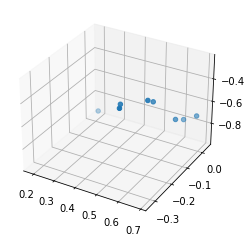

In [2]:
# -*- coding: utf-8 -*-
"""
@author: Raluca Sandu
"""
# from mpl_toolkits.mplot3d import axes3d
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull


# from generate_test_ellipse import GetRandom, random_point_ellipse, random_point_ellipsoid


def inner_ellipsoid_fit(points):
    """Find the inscribed ellipsoid into a set of points of maximum volume. Return its matrix-offset form."""
    dim = points.shape[1]
    A,b,hull = GetHull(points)

    B = cp.Variable((dim,dim), PSD=True)  # Ellipsoid
    d = cp.Variable(dim)                  # Center

    constraints = [cp.norm(B@A[i],2)+A[i]@d<=b[i] for i in range(len(A))]
    prob = cp.Problem(cp.Minimize(-cp.log_det(B)), constraints)
    optval = prob.solve()
    if optval==np.inf:
        raise Exception("No solution possible!")
    print(f"Optimal value: {optval}")

    return B.value, d.value


def Plot(points, hull, B, d):
    fig = plt.figure()
    if points.shape[1] == 2:
        ax = fig.add_subplot(111)
        ax.scatter(points[:, 0], points[:, 1])
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        display_points = np.array([random_point_ellipse([[1, 0], [0, 1]], [0, 0]) for i in range(100)])
        display_points = display_points @ B + d
        ax.scatter(display_points[:, 0], display_points[:, 1])
    elif points.shape[1] == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(points[:, 0], points[:, 1], points[:, 2])
        display_points = np.array([random_point_ellipsoid(1, 1, 1, 0, 0, 0) for i in range(len(points))])
        display_points = display_points @ B + d
        ax.scatter(display_points[:, 0], display_points[:, 1], display_points[:, 2])
        return ax
    plt.show()


def GetHull(points):
    dim = points.shape[1]
    hull = ConvexHull(points)
    A = hull.equations[:,0:dim]
    b = hull.equations[:,dim]
    return A, -b, hull  #Negative moves b to the RHS of the inequality


if __name__ == '__main__':
    # points = GetRandom(dims=3, Npts=200)
    points = np.array([[ 0.53135758, -0.25818091, -0.32382715],
                       [ 0.58368177, -0.3286576,  -0.23854156,],
                       [ 0.18741533,  0.03066228, -0.94294771],
                       [ 0.65685862, -0.09220681, -0.60347573],
                       [ 0.63137604, -0.22978685, -0.27479238],
                       [ 0.59683195, -0.15111101, -0.40536606],
                       [ 0.68646128,  0.0046802,  -0.68407367],
                       [ 0.62311759,  0.0101013,  -0.75863324]])

    A, b, hull = GetHull(points)
    B, d = inner_ellipsoid_fit(points)
    Plot(points, hull, B, d)

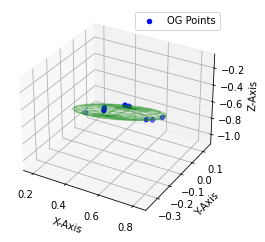

In [4]:
# -*- coding: utf-8 -*-
"""
@author: Raluca Sandu
"""
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from skimage.draw import ellipsoid
# from inner_ellipsoid import inner_ellipsoid_fit

def outer_ellipsoid_fit(points, tol=0.001):
    """
    Find the minimum volume ellipsoid enclosing (outside) a set of points.
    Return A, c where the equation for the ellipse given in "center form" is
    (x-c).T * A * (x-c) = 1
    """

    points = np.asmatrix(points)
    N, d = points.shape
    Q = np.column_stack((points, np.ones(N))).T
    u = np.ones(N) / N
    err = 1 + tol
    while err > tol:
        X = Q * np.diag(u) * Q.T
        M = np.diag(Q.T * la.inv(X) * Q)
        jdx = np.argmax(M)
        step_size = (M[jdx] - d - 1.0) / ((d + 1) * (M[jdx] - 1.0))
        new_u = (1 - step_size) * u
        new_u[jdx] += step_size
        err = la.norm(new_u - u)
        u = new_u

    c = u * points  # center of ellipsoid
    A = la.inv(points.T * np.diag(u) * points - c.T * c) / d

    # U, D, V = la.svd(np.asarray(A))
    # rx, ry, rz = 1. / np.sqrt(D)
    #
    # return rx, ry, rz
    return np.asarray(A), np.squeeze(np.asarray(c))


def plot_ellipsoid(A, centroid, color, ax):
    """
    :param A: matrix
    :param centroid: center
    :param color: color
    :param ax: axis
    :return:
    """
    centroid = np.asarray(centroid)
    A = np.asarray(A)
    U, D, V = la.svd(A)
    rx, ry, rz = 1. / np.sqrt(D)
    u, v = np.mgrid[0:2 * np.pi:20j, -np.pi / 2:np.pi / 2:10j]
    x = rx * np.cos(u) * np.cos(v)
    y = ry * np.sin(u) * np.cos(v)
    z = rz * np.sin(v)
    E = np.dstack((x, y, z))
    E = np.dot(E, V) + centroid
    x, y, z = np.rollaxis(E, axis=-1)
    ax.plot_wireframe(x, y, z, cstride=1, rstride=1, color=color, alpha=0.2)
    ax.set_zlabel('Z-Axis')
    ax.set_ylabel('Y-Axis')
    ax.set_xlabel('X-Axis')


if __name__ == '__main__':

    #some random points
    points = np.array([[ 0.53135758, -0.25818091, -0.32382715],
                   [ 0.58368177, -0.3286576,  -0.23854156,],
                   [ 0.18741533,  0.03066228, -0.94294771],
                   [ 0.65685862, -0.09220681, -0.60347573],
                   [ 0.63137604, -0.22978685, -0.27479238],
                   [ 0.59683195, -0.15111101, -0.40536606],
                   [ 0.68646128,  0.0046802,  -0.68407367],
                   [ 0.62311759,  0.0101013,  -0.75863324]])
    A_outer, centroid_outer = outer_ellipsoid_fit(points)
    # B, d = inner_ellipsoid_fit(points)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='OG Points')
    plot_ellipsoid(A_outer, centroid_outer, 'green', ax)
    # plot_ellipsoid(B, d, 'orange', ax)
    plt.legend(loc='best')
    plt.show()

In [5]:
import numpy as np


def ellipsoid_fit(point_data, mode=''):
    """ Fit an ellipsoid to a cloud of points using linear least squares
        Based on Yury Petrov MATLAB algorithm: "ellipsoid_fit.m"
    """

    X = point_data[:, 0]
    Y = point_data[:, 1]
    Z = point_data[:, 2]

    # AlGEBRAIC EQUATION FOR ELLIPSOID, from CARTESIAN DATA
    if mode == '':  # 9-DOF MODE
        D = np.array([X * X + Y * Y - 2 * Z * Z,
                      X * X + Z * Z - 2 * Y * Y,
                      2 * X * Y, 2 * X * Z, 2 * Y * Z,
                      2 * X, 2 * Y, 2 * Z,
                      1 + 0 * X]).T

    elif mode == 0:  # 6-DOF MODE (no rotation)
        D = np.array([X * X + Y * Y - 2 * Z * Z,
                      X * X + Z * Z - 2 * Y * Y,
                      2 * X, 2 * Y, 2 * Z,
                      1 + 0 * X]).T

    # THE RIGHT-HAND-SIDE OF THE LLSQ PROBLEM
    d2 = np.array([X * X + Y * Y + Z * Z]).T

    # SOLUTION TO NORMAL SYSTEM OF EQUATIONS
    u = np.linalg.solve(D.T.dot(D), D.T.dot(d2))
    # chi2 = (1 - (D.dot(u)) / d2) ^ 2

    # CONVERT BACK TO ALGEBRAIC FORM
    if mode == '':  # 9-DOF-MODE
        a = np.array([u[0] + 1 * u[1] - 1])
        b = np.array([u[0] - 2 * u[1] - 1])
        c = np.array([u[1] - 2 * u[0] - 1])
        v = np.concatenate([a, b, c, u[2:, :]], axis=0).flatten()

    elif mode == 0:  # 6-DOF-MODE
        a = u[0] + 1 * u[1] - 1
        b = u[0] - 2 * u[1] - 1
        c = u[1] - 2 * u[0] - 1
        zs = np.array([0, 0, 0])
        v = np.hstack((a, b, c, zs, u[2:, :].flatten()))

    else:
        pass

    # PUT IN ALGEBRAIC FORM FOR ELLIPSOID
    A = np.array([[v[0], v[3], v[4], v[6]],
                  [v[3], v[1], v[5], v[7]],
                  [v[4], v[5], v[2], v[8]],
                  [v[6], v[7], v[8], v[9]]])

    # FIND CENTRE OF ELLIPSOID
    centre = np.linalg.solve(-A[0:3, 0:3], v[6:9])

    # FORM THE CORRESPONDING TRANSLATION MATRIX
    T = np.eye(4)
    T[3, 0:3] = centre

    # TRANSLATE TO THE CENTRE, ROTATE
    R = T.dot(A).dot(T.T)

    # SOLVE THE EIGENPROBLEM
    evals, evecs = np.linalg.eig(R[0:3, 0:3] / -R[3, 3])

    # SORT EIGENVECTORS
    # i = np.argsort(evals)
    # evals = evals[i]
    # evecs = evecs[:, i]
    # evals = evals[::-1]
    # evecs = evecs[::-1]

    # CALCULATE SCALE FACTORS AND SIGNS
    radii = np.sqrt(1 / abs(evals))
    sgns = np.sign(evals)
    radii *= sgns

    return (centre, evecs, radii)


if __name__ == "__main__":
    pass

In [24]:
import tifffile as tif

img_path = '/home/tli_project/Desktop/Data/T4/neurons/220209_P36_N1_GFP_flipV.tif'
image_4D = tif.imread(img_path)

# converting to point_cloud
# threshold = np.quantile(image_4D, 0.99)
threshold = 1
Z, Y, X = np.where(image_4D[0] > threshold)
val = np.array(list(zip(Z,X,Y)))

In [25]:
centre, evecs, radii = ellipsoid_fit(val, mode='')

In [26]:
centre, evecs, radii

(array([ 21.5, 199.5, 199.5]),
 array([[-1.00000000e+00,  1.41749640e-15, -1.31443437e-14],
        [ 1.24610749e-14, -2.31069025e-01, -9.72935914e-01],
        [ 4.41638384e-15,  9.72937359e-01, -2.31075112e-01]]),
 array([  12.85084763, 1063.4104539 , 1063.41045391]))

In [27]:
import numpy as np
import math 


def data_regularize(data, type="spherical", divs=10):
    limits = np.array([
        [min(data[:, 0]), max(data[:, 0])],
        [min(data[:, 1]), max(data[:, 1])],
        [min(data[:, 2]), max(data[:, 2])]])
        
    regularized = []

    if type == "cubic": # take mean from points in the cube
        
        X = np.linspace(*limits[0], num=divs)
        Y = np.linspace(*limits[1], num=divs)
        Z = np.linspace(*limits[2], num=divs)

        for i in range(divs-1):
            for j in range(divs-1):
                for k in range(divs-1):
                    points_in_sector = []
                    for point in data:
                        if (point[0] >= X[i] and point[0] < X[i+1] and
                                point[1] >= Y[j] and point[1] < Y[j+1] and
                                point[2] >= Z[k] and point[2] < Z[k+1]):
                            points_in_sector.append(point)
                    if len(points_in_sector) > 0:
                        regularized.append(np.mean(np.array(points_in_sector), axis=0))

    elif type == "spherical": #take mean from points in the sector
        divs_u = divs 
        divs_v = divs * 2

        center = np.array([
            0.5 * (limits[0, 0] + limits[0, 1]),
            0.5 * (limits[1, 0] + limits[1, 1]),
            0.5 * (limits[2, 0] + limits[2, 1])])
        d_c = data - center
    
        #spherical coordinates around center
        r_s = np.sqrt(d_c[:, 0]**2. + d_c[:, 1]**2. + d_c[:, 2]**2.)
        d_s = np.array([
            r_s,
            np.arccos(d_c[:, 2] / r_s),
            np.arctan2(d_c[:, 1], d_c[:, 0])]).T

        u = np.linspace(0, np.pi, num=divs_u)
        v = np.linspace(-np.pi, np.pi, num=divs_v)

        for i in range(divs_u - 1):
            for j in range(divs_v - 1):
                points_in_sector = []
                for k, point in enumerate(d_s):
                    if (point[1] >= u[i] and point[1] < u[i + 1] and
                            point[2] >= v[j] and point[2] < v[j + 1]):
                        points_in_sector.append(data[k])

                if len(points_in_sector) > 0:
                    regularized.append(np.mean(np.array(points_in_sector), axis=0))
# Other strategy of finding mean values in sectors
#                    p_sec = np.array(points_in_sector)
#                    R = np.mean(p_sec[:,0])
#                    U = (u[i] + u[i+1])*0.5
#                    V = (v[j] + v[j+1])*0.5
#                    x = R*math.sin(U)*math.cos(V)
#                    y = R*math.sin(U)*math.sin(V)
#                    z = R*math.cos(U)
#                    regularized.append(center + np.array([x,y,z]))
    return np.array(regularized)


# https://github.com/minillinim/ellipsoid
def ellipsoid_plot(center, radii, rotation, ax, plot_axes=False, cage_color='b', cage_alpha=0.2):
    """Plot an ellipsoid"""
        
    u = np.linspace(0.0, 2.0 * np.pi, 100)
    v = np.linspace(0.0, np.pi, 100)
    
    # cartesian coordinates that correspond to the spherical angles:
    x = radii[0] * np.outer(np.cos(u), np.sin(v))
    y = radii[1] * np.outer(np.sin(u), np.sin(v))
    z = radii[2] * np.outer(np.ones_like(u), np.cos(v))
    # rotate accordingly
    for i in range(len(x)):
        for j in range(len(x)):
            [x[i, j], y[i, j], z[i, j]] = np.dot([x[i, j], y[i, j], z[i, j]], rotation) + center

    if plot_axes:
        # make some purdy axes
        axes = np.array([[radii[0],0.0,0.0],
                         [0.0,radii[1],0.0],
                         [0.0,0.0,radii[2]]])
        # rotate accordingly
        for i in range(len(axes)):
            axes[i] = np.dot(axes[i], rotation)

        # plot axes
        for p in axes:
            X3 = np.linspace(-p[0], p[0], 100) + center[0]
            Y3 = np.linspace(-p[1], p[1], 100) + center[1]
            Z3 = np.linspace(-p[2], p[2], 100) + center[2]
            ax.plot(X3, Y3, Z3, color=cage_color)

    # plot ellipsoid
    ax.plot_wireframe(x, y, z,  rstride=4, cstride=4, color=cage_color, alpha=cage_alpha)


# http://www.mathworks.com/matlabcentral/fileexchange/24693-ellipsoid-fit
# for arbitrary axes
def ellipsoid_fit(X):
    x = X[:, 0]
    y = X[:, 1]
    z = X[:, 2]
    D = np.array([x * x + y * y - 2 * z * z,
                 x * x + z * z - 2 * y * y,
                 2 * x * y,
                 2 * x * z,
                 2 * y * z,
                 2 * x,
                 2 * y,
                 2 * z,
                 1 - 0 * x])
    d2 = np.array(x * x + y * y + z * z).T # rhs for LLSQ
    u = np.linalg.solve(D.dot(D.T), D.dot(d2))
    a = np.array([u[0] + 1 * u[1] - 1])
    b = np.array([u[0] - 2 * u[1] - 1])
    c = np.array([u[1] - 2 * u[0] - 1])
    v = np.concatenate([a, b, c, u[2:]], axis=0).flatten()
    A = np.array([[v[0], v[3], v[4], v[6]],
                  [v[3], v[1], v[5], v[7]],
                  [v[4], v[5], v[2], v[8]],
                  [v[6], v[7], v[8], v[9]]])

    center = np.linalg.solve(- A[:3, :3], v[6:9])

    translation_matrix = np.eye(4)
    translation_matrix[3, :3] = center.T

    R = translation_matrix.dot(A).dot(translation_matrix.T)

    evals, evecs = np.linalg.eig(R[:3, :3] / -R[3, 3])
    evecs = evecs.T

    radii = np.sqrt(1. / np.abs(evals))
    radii *= np.sign(evals)

    return center, evecs, radii, 

In [28]:
def ellipsoid_fit_LS(pos):
    
    # centre coordinates on origin
    pos = pos - np.mean(pos, axis=0)
    
    # build our regression matrix
    A = pos**2
    
    # vector of ones
    O = np.ones(len(A))
    
    # least squares solver
    B, resids, rank, s = np.linalg.lstsq(A, O)
    
    # solving for a, b, c
    a_ls = np.sqrt(1.0/B[0])
    b_ls = np.sqrt(1.0/B[1])
    c_ls = np.sqrt(1.0/B[2])
    
    return (a_ls, b_ls, c_ls)

In [29]:
ellipsoid_fit_LS(val)

/tmp/ipykernel_9213/2136251378.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B, resids, rank, s = np.linalg.lstsq(A, O)


(24.739766321628508, 225.13685485977769, 225.13685485976924)